# LAB 7: Error analysis

Objectives
* Construct a  linear text classifier using SGDClassifier
* Evaluate its performance and categorize the errors that it makes
* Eaxmine model's coefficients and decision function values
* Interpret model results using LIME

In [1]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train = pd.read_parquet("s3://ling583/lab7-train.parquet", storage_options={"anon":True})
test = pd.read_parquet("s3://ling583/lab7-test.parquet", storage_options={"anon":True})

In [3]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [4]:
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [5]:
predicted = sgd.predict(test["text"])
print(classification_report(test["topics"], predicted))

              precision    recall  f1-score   support

        GJOB       0.97      0.94      0.95       573
        GPOL       0.94      0.97      0.95      1853
        GSPO       1.00      0.99      1.00      1410
        GVIO       0.93      0.90      0.91       928

    accuracy                           0.96      4764
   macro avg       0.96      0.95      0.95      4764
weighted avg       0.96      0.96      0.96      4764



---

## LIME

In [6]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

In [7]:
explainer = LimeTextExplainer(class_names=sgd.named_steps['sgdclassifier'].classes_)

In [8]:
test["topics"].iloc[1613], test["text"].iloc[1613]

('GPOL',
 'Top N.Korean officers climb hierarchy - Seoul. A North Korean marshal and two vice-marshals have been listed in the top seven of the Stalinist country\'s ruling hierarchy in a political shift towards the military, analysts said on Monday. "It is unprecedented that three military figures have been listed in such high positions," said Park Sung-hoon, a director general at the Unification Ministry in Seoul. Park said the three officers were listed among the seven top leaders when Pyongyang released its hierarchy during a military parade on Friday. The parade marked the 65th anniversary of the army. "(North Korean leader) Kim Jong-il depends almost solely on the military to maintain the country\'s system," Park said. Marshal Ri Ul-sol and vice marshals Jo Myong-rok and Kim Yong-chun were ranked only behind Kim Jong-il, supreme commander of the country\'s 1.1 million-strong military, and three vice presidents. Kim Jong-il has yet to be formally confirmed as state president and ge

In [9]:
exp = explainer.explain_instance(
    test["text"].loc[1613], sgd.decision_function, num_features=15, labels=[0, 1, 2, 3]
)

[]

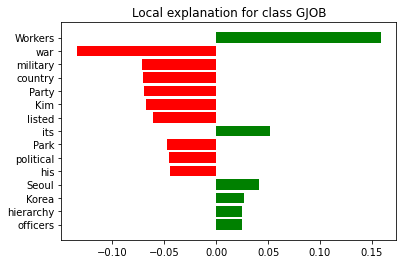

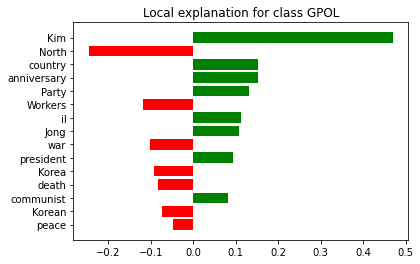

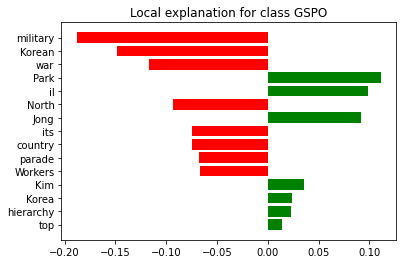

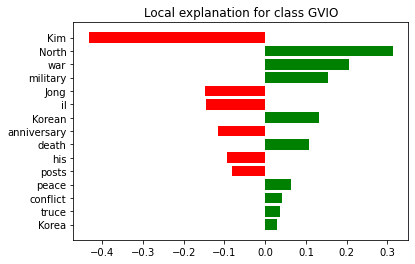

In [10]:
for i in range(0, 4):
    exp.as_pyplot_figure(i)
plt.plot()

In [11]:
err = test[(test['topics']=='GVIO')&(predicted=='GPOL')]

In [12]:
err.iloc[30]

text      G7 leaders say Congo aid depends on reforms. T...
topics                                                 GVIO
Name: 1358, dtype: object

In [13]:
err.iloc[30]['text']

'G7 leaders say Congo aid depends on reforms. The world\'s leading industrial democracies told the new Democratic Republic of the Congo on Saturday that its eligibility for aid would depend on its commitment to democratic reform and respect for human rights. A report by foreign ministers of the Group of Seven nations and Russia said it was important to assist the new authorities who took over the vast African country last month and looked forward to close cooperation with other potential donors. It said the changes in the country, formerly named Zaire, highlighted the "importance of peaceful democratic transition and the establishment of a broadly-based interim administration." The report said: "We believe it is important to assist the new authorities in the transition to an elected government, promote respect for human rights, address urgent humanitarian needs and facilitate economic renewal." But it added: "The willingness of our governments to assist in the rebuilding of national in

[]

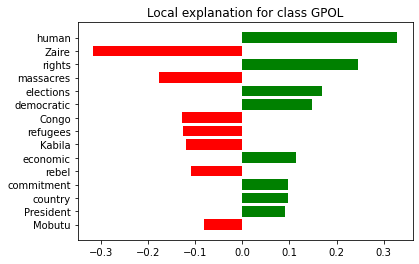

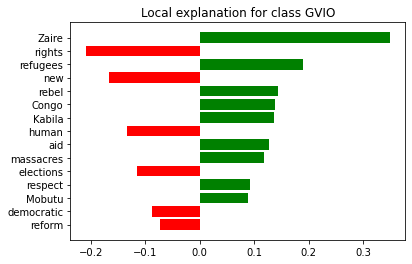

In [14]:
exp = explainer.explain_instance(
    err["text"].iloc[30], sgd.decision_function, num_features=15, labels=[1, 3]
)
for i in [1, 3]:
    exp.as_pyplot_figure(i)
plt.plot()

In [15]:
err.iloc[50]

text      Hundreds remember TWA victims at mass. One yea...
topics                                                 GVIO
Name: 2705, dtype: object

In [16]:
err.iloc[50]['text']

'Hundreds remember TWA victims at mass. One year to the day that TWA Flight 800 exploded and crashed into the sea off New York\'s Long Island, hundreds gathered at a memorial mass for the 230 people who perished in the disaster. Relatives and friends of the victims, colleagues of the flight crew, workers involved in the difficult recovery effort and investigators who have yet to solve the mystery of the crash sat somberly in St. Patrick\'s Cathedral in New York. "When the loss is so sudden and of such magnitude ... the pain we experience is ever more intense," said the Rev. John Ferry, the main celebrant at the memorial Mass. "We come here this morning not to remember how they died, but more importantly to remember how they lived." The Roman Catholic Mass was one of at least three memorial services planned in the United States on Thursday for the 230 passengers and crew killed in the July 17, 1996 crash. The victims included citizens of the United States, several European countries and

[]

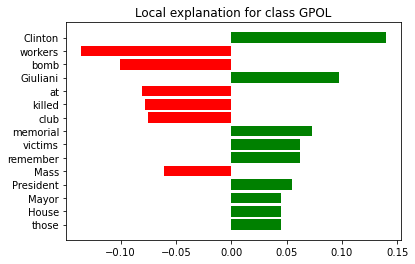

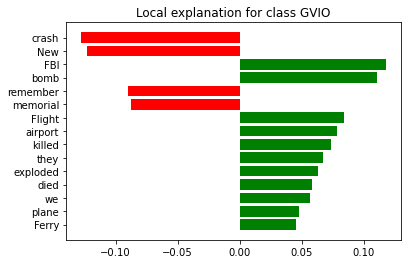

In [17]:
exp = explainer.explain_instance(
    err["text"].iloc[50], sgd.decision_function, num_features=15, labels=[1, 3]
)
for i in [1, 3]:
    exp.as_pyplot_figure(i)
plt.plot()

In [18]:
import kwic

In [19]:
kwic.kwic('upper', train['text'])

9,"to holiday trips and cars rather than on having children, Dobritz said. In",upper,"-income groups, many women choose not to have children because they do not"
26,"the Sejm, needed to muster 50 percent plus one of the votes to reject the",upper,"house veto. The Church, drawing on the authority of Polish-born Pope John"
52,"t did not project how many seats each party would win. The Senate, the new",upper,"chamber of Czech parliament which will have limited legislative powers, is"
182,"approve the mission, by 162 votes to 81 with one abstention in the Senate (",upper,house). Prodi was never in danger since he commands an absolute majority i
196,s. The rupiah quickly recovered from Thursday's weakness to trade near the,upper,limit of the central bank's intervention band against the dollar. At 0842
268,the SPD can block most tax measures through its majority in the Bundesrat,upper,"house. Kohl warned SPD leaders, who pulled out of tax talks with the gover"
400,n two years without elections. His draft constitution would also create an,upper,"house of parliament partly appointed by himself, and give him the right to"
448,"t, is about 70 km (45 miles) south of Lubutu, which guards the road to the",Upper,"Zaire provincial capital of Kisangani, headquarters for a counter-offensiv"
489,"nists, had left for the Christmas holidays. The government had the Senate (",upper,"house) reject the harshest amendments, but the bill's return to the lower"
544,"vote against, an offifial said. The bill now advances to the floor of the",upper,house. The legislation is considered important for upcoming privatizatio


**TO DO:** Write a brief general summary of the results of this analysis (along with the previous ones). Do we have a good classifier? What would be the next steps for improving it?

In conclusion, we have a very decent based model for four labels including job, politic, sport, and violent. However, after optimizing the model, the optimized model is better than the based model with an F1 accuracy of .96 compared to 0.95 (base model). In addition, the macro average of the four labels' F2 scores are also higher in the optimized model (0.95) compared to the based model (0.94). In addition, the optimized model is significantly different from the base model with p-values smaller than 0.05 using two tests including binomial and Wilcoxon test. 

In terms of errors, this classifier model does not produce a lot of error, as seen in the confusion matrix. The confusion matrix's diagonal lines are the prediected values classified with the true values. This line has the proportion of more than 90%. This indicate that the proportion of errors are less than 10% for all four labels including sport, violent, politic, and job. For some predicted values that have errors in predicting labels, sometimes the model predicted the labels clearly wrong when we read the description. However, there are time, the description clearly said that the predicted model is predicted correctly and the emperical labels are incorrect. Therefore, our model seems robust. We have good classifier, but the model can still improve.     

There are some ways to improve the classifier in the future: 
- Have a wider range of labels with more specific words associate with the labels 
- Minor edit the minimum and maximum df parameters, and alpha parameters to optimize the model to have a better model with higher accuracy rate
- Manually labels the labels and documents that have high proportion in errors like violent documents are misclassified as politic text 9% of the time 
- Manually correct/check the words that do not seems to belong to a certain labels.
- Adjust the thredsold of the classifier's margin to increase the accuracy rate 